In [1]:
import mne
import numpy as np
import ghibtools as gh
import neurokit2 as nk
import physio
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bibliotheque import *

In [2]:
file_controle_musique = '../Data/Pilotes/pilote_01_val_ctrl_mus.vhdr'
file_musique = '../Data/Pilotes/pilote_01_val_mus.vhdr'
file_controle_odeur =  '../Data/Pilotes/pilote_01_val_ctrl_odor.vhdr'
file_odeur = '../Data/Pilotes/pilote_01_val_odor.vhdr'
files = [file_controle_musique , file_musique, file_controle_odeur, file_odeur]
sessions = ['control_musique','musique','controle_odeur','odeur']

In [3]:
concat = []
for file in files:
    raw = mne.io.read_raw_brainvision(file, verbose = 'CRITICAL')
    concat.append(mne_to_xarray(raw).sel(time = slice(0, 600)))
da = xr.concat(concat, dim = 'session')
da.coords['session'] = sessions

In [4]:
srate = da.attrs['srate']

In [5]:
da

<xarray.DataArray (session: 4, chan: 35, time: 600001)>
array([[[-1.98381734e-02, -1.98363668e-02, -1.98376363e-02, ...,
         -2.28764531e-02, -2.28776738e-02, -2.28727422e-02],
        [-1.06493110e-02, -1.06458442e-02, -1.06448676e-02, ...,
         -1.31472589e-02, -1.31484796e-02, -1.31460382e-02],
        [-8.42118709e-03, -8.41908749e-03, -8.41889217e-03, ...,
         -1.23369566e-02, -1.23419859e-02, -1.23338804e-02],
        ...,
        [ 3.72773409e-06,  3.72781754e-06,  3.72781754e-06, ...,
          2.88732052e-06,  2.88711786e-06,  2.88692713e-06],
        [ 1.67964941e+03,  1.67904919e+03,  1.67703247e+03, ...,
          1.67087134e+03,  1.67155298e+03,  1.67155566e+03],
        [-2.62463093e+01, -2.62925034e+01, -2.63336296e+01, ...,
          2.37625847e+01,  2.37694378e+01,  2.37691402e+01]],

       [[-2.33281131e-02, -2.33318240e-02, -2.33306521e-02, ...,
         -2.76743022e-02, -2.76735210e-02, -2.76736675e-02],
        [-1.35108329e-02, -1.35122489e-02, -1.35121513e-02, ...,
         -1.89253809e-02, -1.89253321e-02, -1.89244532e-02],
        [-1.26250912e-02, -1.26284603e-02, -1.26277767e-02, ...,
         -1.71155674e-02, -1.71133701e-02, -1.71129307e-02],
...
        [ 3.66597176e-06,  3.66491079e-06,  3.66369486e-06, ...,
          2.65249014e-06,  2.65321732e-06,  2.65233517e-06],
        [ 1.63629150e+03,  1.63641626e+03,  1.63644080e+03, ...,
          1.54774634e+03,  1.54780896e+03,  1.54792432e+03],
        [-4.46945429e+00, -4.39941883e+00, -4.32997942e+00, ...,
         -2.78136139e+01, -2.77698040e+01, -2.77224178e+01]],

       [[-3.22987628e-02, -3.22975909e-02, -3.22915850e-02, ...,
         -3.58430481e-02, -3.58403625e-02, -3.58395324e-02],
        [-2.25080451e-02, -2.25085334e-02, -2.25065803e-02, ...,
         -2.44115598e-02, -2.44125852e-02, -2.44131711e-02],
        [-2.29194707e-02, -2.29207890e-02, -2.29189336e-02, ...,
         -2.75116070e-02, -2.75113140e-02, -2.75120953e-02],
        ...,
        [ 3.69013548e-06,  3.68653536e-06,  3.69170904e-06, ...,
          2.85652876e-06,  2.85561085e-06,  2.85468102e-06],
        [ 1.49868494e+03,  1.49782837e+03,  1.49746985e+03, ...,
          1.63846252e+03,  1.63861121e+03,  1.63868848e+03],
        [ 1.19155350e+02,  1.19150581e+02,  1.19150879e+02, ...,
         -2.81602144e+00, -2.79277563e+00, -2.75969505e+00]]])
Coordinates:
  * chan     (chan) <U13 'Fp1' 'Fz' 'F3' ... 'GSR' 'RespiNasale' 'RespiVentrale'
  * time     (time) float64 0.0 0.001 0.002 0.003 ... 600.0 600.0 600.0 600.0
  * session  (session) <U15 'control_musique' 'musique' 'controle_odeur' 'odeur'
Attributes:
    srate:    1000.0

In [32]:
eeg_chans = [chan for chan in da.coords['chan'].values if not chan in ['GSR','ECG','RespiNasale','RespiVentrale']]

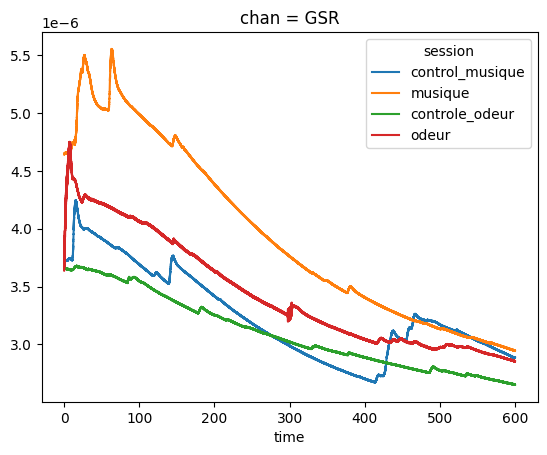

In [6]:
da.loc[:,'GSR',:].plot.line(x='time')

In [7]:
da_freqs = None

for session in sessions:
    f, Pxx = gh.spectre(da.loc[session, 'RespiNasale',:].values, srate, lowest_freq = 0.04)
    if da_freqs is None:
        da_freqs = gh.init_da({'session':sessions , 'freq':f})
    da_freqs.loc[session, : ] = Pxx

In [8]:
da_freqs

<xarray.DataArray (session: 4, freq: 62501)>
array([[9.32441663e-01, 6.33914438e+00, 1.08853923e+01, ...,
        6.89028821e-09, 8.07581542e-09, 3.59892538e-09],
       [1.74757918e+00, 1.02803789e+01, 1.17304915e+01, ...,
        1.58377763e-08, 1.23612612e-08, 3.81992373e-09],
       [1.51673913e+00, 5.07683427e+00, 7.15633692e+00, ...,
        6.99731718e-09, 4.91684099e-09, 2.03664623e-09],
       [2.38470123e+00, 7.09991403e+00, 1.05303330e+01, ...,
        8.54158030e-09, 1.83291033e-08, 8.64474460e-09]])
Coordinates:
  * session  (session) <U15 'control_musique' 'musique' 'controle_odeur' 'odeur'
  * freq     (freq) float64 0.0 0.008 0.016 0.024 ... 500.0 500.0 500.0 500.0

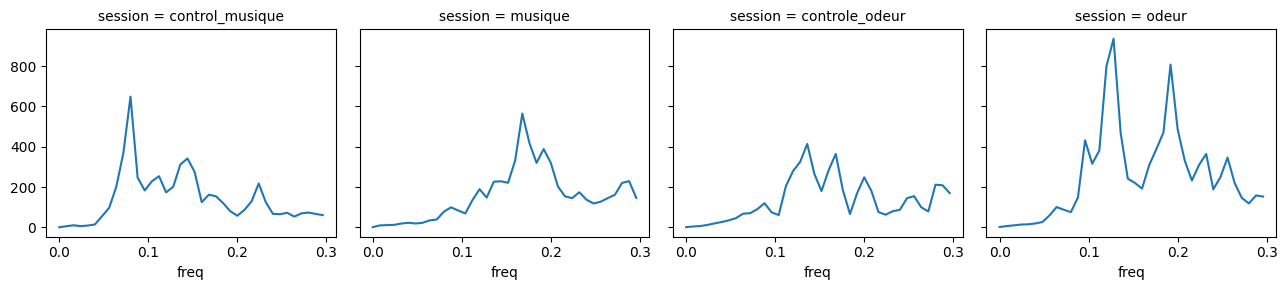

In [9]:
da_freqs.sel(freq = slice(0,0.3)).plot.line(x='freq', col = 'session')

In [23]:
%matplotlib widget

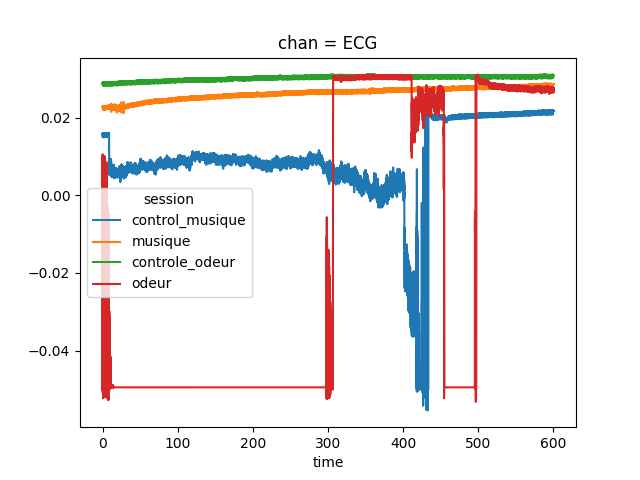

In [24]:
da.loc[:, 'ECG' , :].plot.line(x='time')

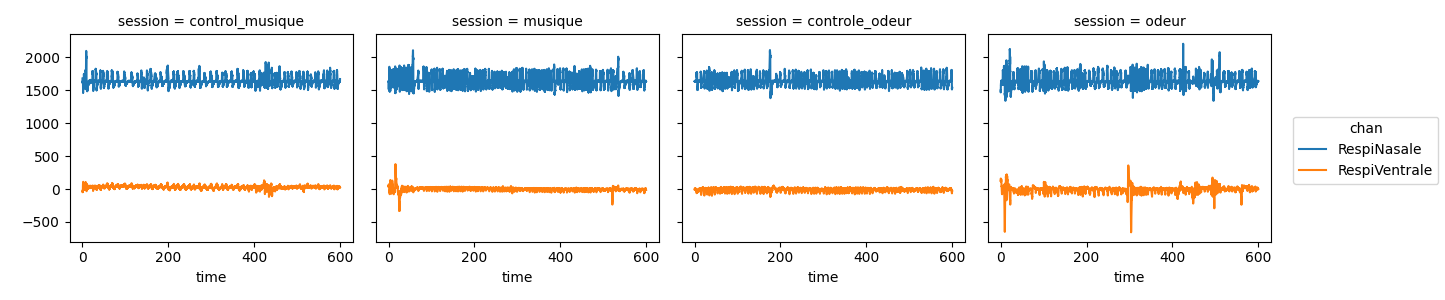

In [31]:
da.loc[:, ['RespiNasale','RespiVentrale'] , :].plot.line(x='time', col = 'session', hue = 'chan')

In [25]:
concat_hrv = []
for session in sessions:
    ecg = da.loc[session , 'ECG', : ].values
    clean_ecg, ecg_peaks = physio.compute_ecg(ecg, srate)
    hrv = physio.compute_ecg_metrics(ecg_peaks, srate, min_interval_ms=500., max_interval_ms=2000., verbose = False)
    hrv.insert(0, 'session', session)
    concat_hrv.append(hrv)
    
    # hrv = gh.get_hrv_metrics(ecg, srate)
    # hrv.insert(0, 'session', session)
    # hrvs.append(hrv)


/mnt/autofs/cmo/users/ValentinGhibaudo/physiotools/physio/physio/ecg.py:85: RuntimeWarning: Mean of empty slice
  metrics['HRV_Mean'] = np.nanmean(delta_ms)
/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/mnt/autofs/cmo/users/ValentinGhibaudo/physiotools/physio/physio/ecg.py:94: RuntimeWarning: Mean of empty slice
  metrics['HRV_RMSSD'] = np.sqrt(np.nanmean(np.diff(delta_ms)**2))


In [26]:
pd.concat(concat_hrv)

,session,HRV_Mean,HRV_SD,HRV_Median,HRV_Mad,HRV_CV,HRV_MCV,HRV_Asymmetry,HRV_RMSSD
0,control_musique,1055.894737,393.912212,1010.5,404.750406,0.373060,0.400545,-45.394737,608.448650
0,musique,1247.190171,87.561554,1259.5,70.423605,0.070207,0.055914,12.309829,97.857533
0,controle_odeur,1259.342437,95.062156,1272.5,85.249628,0.075486,0.066994,13.157563,94.162860
0,odeur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
hrvs_df = pd.concat(hrvs)

In [28]:
hrvs_df[['HRV_MedianNN','HRV_MadNN']]

,HRV_MedianNN,HRV_MadNN
0,1195.5,98.5929
0,1257.0,88.9560
0,1275.0,93.4038
0,1241.0,115.6428


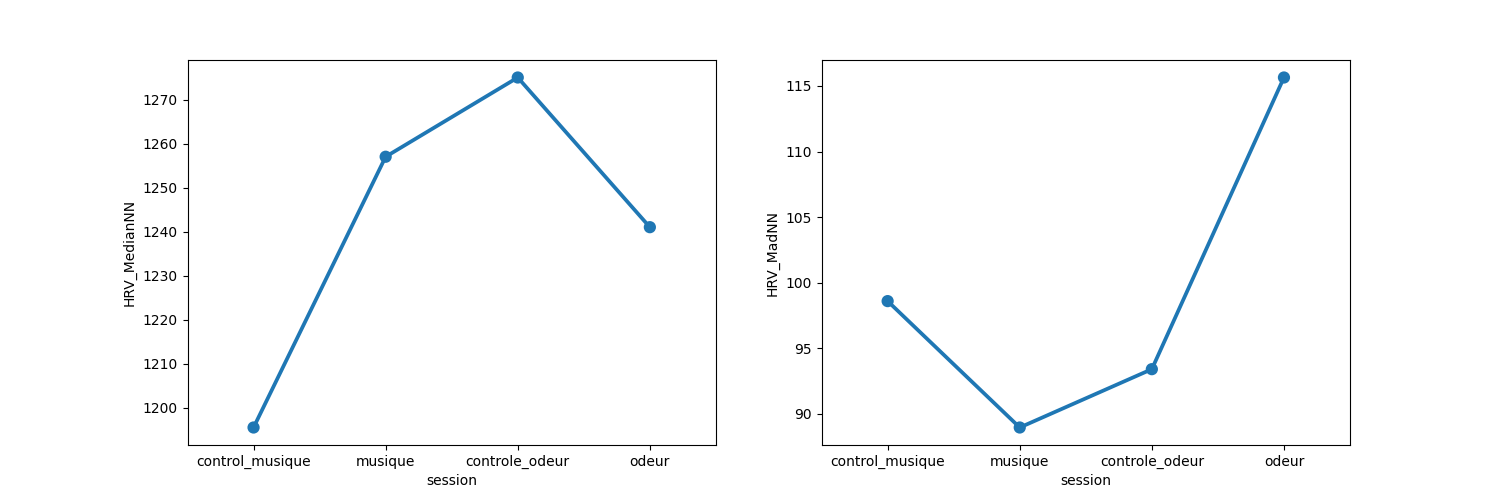

In [29]:
fig, axs = plt.subplots(ncols = 2, figsize = (15,5))
for c, metric in enumerate(['HRV_MedianNN','HRV_MadNN']):
    sns.pointplot(data = hrvs_df , x  = 'session' , y = metric, ax = axs[c])
    

<AxesSubplot: >

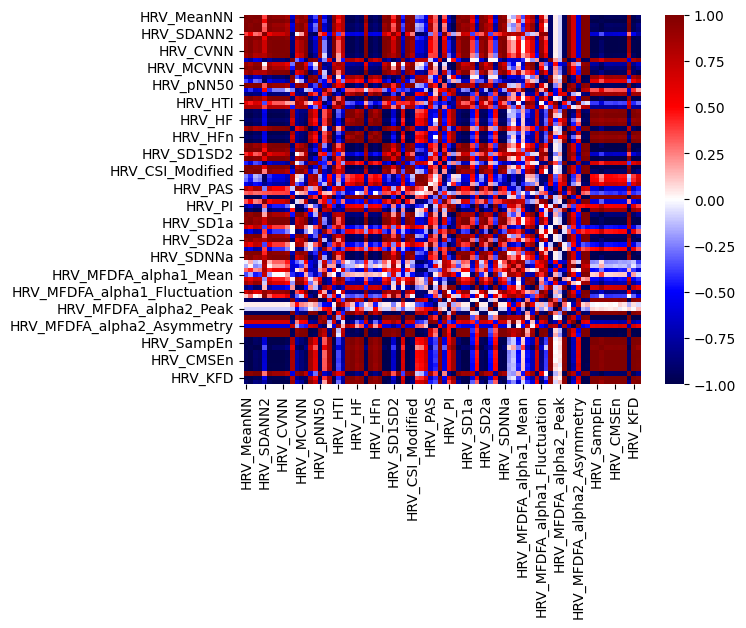

In [14]:
sns.heatmap(hrvs_df.corr(numeric_only = True), annot = False, cmap = 'seismic', center = 0)

In [15]:
hrvs_df.corr().loc['HRV_MadNN',:].sort_values()

/tmp/ipykernel_134296/3197457914.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hrvs_df.corr().loc['HRV_MadNN',:].sort_values()


HRV_MFDFA_alpha1_Asymmetry   -0.982573
HRV_C1d                      -0.977670
HRV_PI                       -0.930569
HRV_ShanEn                   -0.918176
HRV_SI                       -0.885600
                                ...   
HRV_CSI_Modified              0.951074
HRV_C1a                       0.977670
HRV_MCVNN                     0.978677
HRV_MFDFA_alpha1_Delta        0.996489
HRV_MadNN                     1.000000
Name: HRV_MadNN, Length: 86, dtype: float64

In [51]:
da_freqs = None
for chan in da.coords['chan'].values:
    for session in sessions:
        sig = da.loc[session, chan,:].values
        f, Pxx = gh.spectre(sig, srate, lowest_freq = 0.05, nfft_factor = 2)
        if da_freqs is None:
            da_freqs = gh.init_da({'session':sessions, 'chan':da.coords['chan'].values, 'freq':f})
        da_freqs.loc[session, chan, :] = Pxx
    

In [52]:
%matplotlib inline

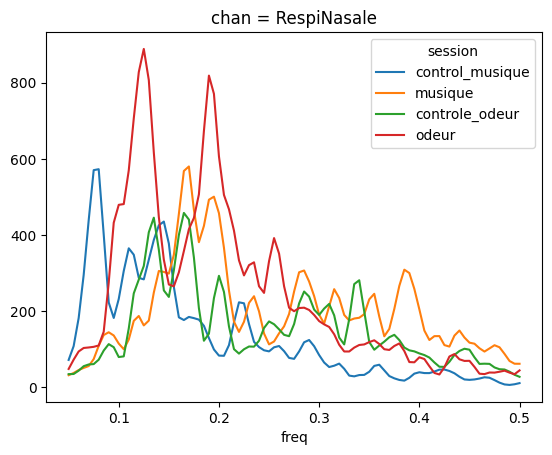

In [53]:
da_freqs.sel(chan = 'RespiNasale', freq = slice(0.05 , 0.5)).plot.line(x='freq')

In [54]:
fbands = {'delta':(1,4), 'theta':(4,8), 'alpha':(8,12), 'beta':(12,30), 'low_gamma':(30,45), 'mid_gamma':(55,95), 'high_gamma':(105,195)}
f = da_freqs.coords['freq'].values

rows = []
for session in sessions:
    for chan in eeg_chans:
    
        Pxx = da_freqs.sel(chan=chan, session=session).values
        for band in fbands.keys():
            mask_f = (f > fbands[band][0]) & (f < fbands[band][1])
            power = np.trapz(Pxx[mask_f])
            rows.append([session , chan, band, power])
        
eeg_power = pd.DataFrame(rows, columns = ['session', 'chan', 'band', 'power'])    

In [55]:
eeg_power

,session,chan,band,power
0,control_musique,Fp1,delta,1.853214e-09
1,control_musique,Fp1,theta,2.620729e-10
2,control_musique,Fp1,alpha,2.572648e-11
3,control_musique,Fp1,beta,2.377533e-11
4,control_musique,Fp1,low_gamma,1.381418e-11
...,...,...,...,...
863,odeur,Fp2,alpha,2.386375e-11
864,odeur,Fp2,beta,2.884564e-11
865,odeur,Fp2,low_gamma,2.188380e-11
866,odeur,Fp2,mid_gamma,5.653039e-11


In [86]:
index_musique = eeg_power[eeg_power['session'] == 'musique'].set_index(['session','chan','band']).index
index_odeur = eeg_power[eeg_power['session'] == 'odeur'].set_index(['session','chan','band']).index

In [91]:
musique_norm = pd.DataFrame(eeg_power[eeg_power['session'] == 'musique']['power'].values / eeg_power[eeg_power['session'] == 'control_musique']['power'].values, columns = ['ratio_power'], index = index_musique).reset_index()
odeur_norm = pd.DataFrame(eeg_power[eeg_power['session'] == 'odeur']['power'].values / eeg_power[eeg_power['session'] == 'controle_odeur']['power'].values, columns = ['ratio_power'], index = index_odeur).reset_index()

In [92]:
eeg_power_norm = pd.concat([musique_norm, odeur_norm])

In [93]:
eeg_power_norm

,session,chan,band,ratio_power
0,musique,Fp1,delta,1.309039
1,musique,Fp1,theta,1.125945
2,musique,Fp1,alpha,1.041427
3,musique,Fp1,beta,0.932398
4,musique,Fp1,low_gamma,0.632293
...,...,...,...,...
212,odeur,Fp2,alpha,1.260893
213,odeur,Fp2,beta,1.577068
214,odeur,Fp2,low_gamma,2.875200
215,odeur,Fp2,mid_gamma,2.863519


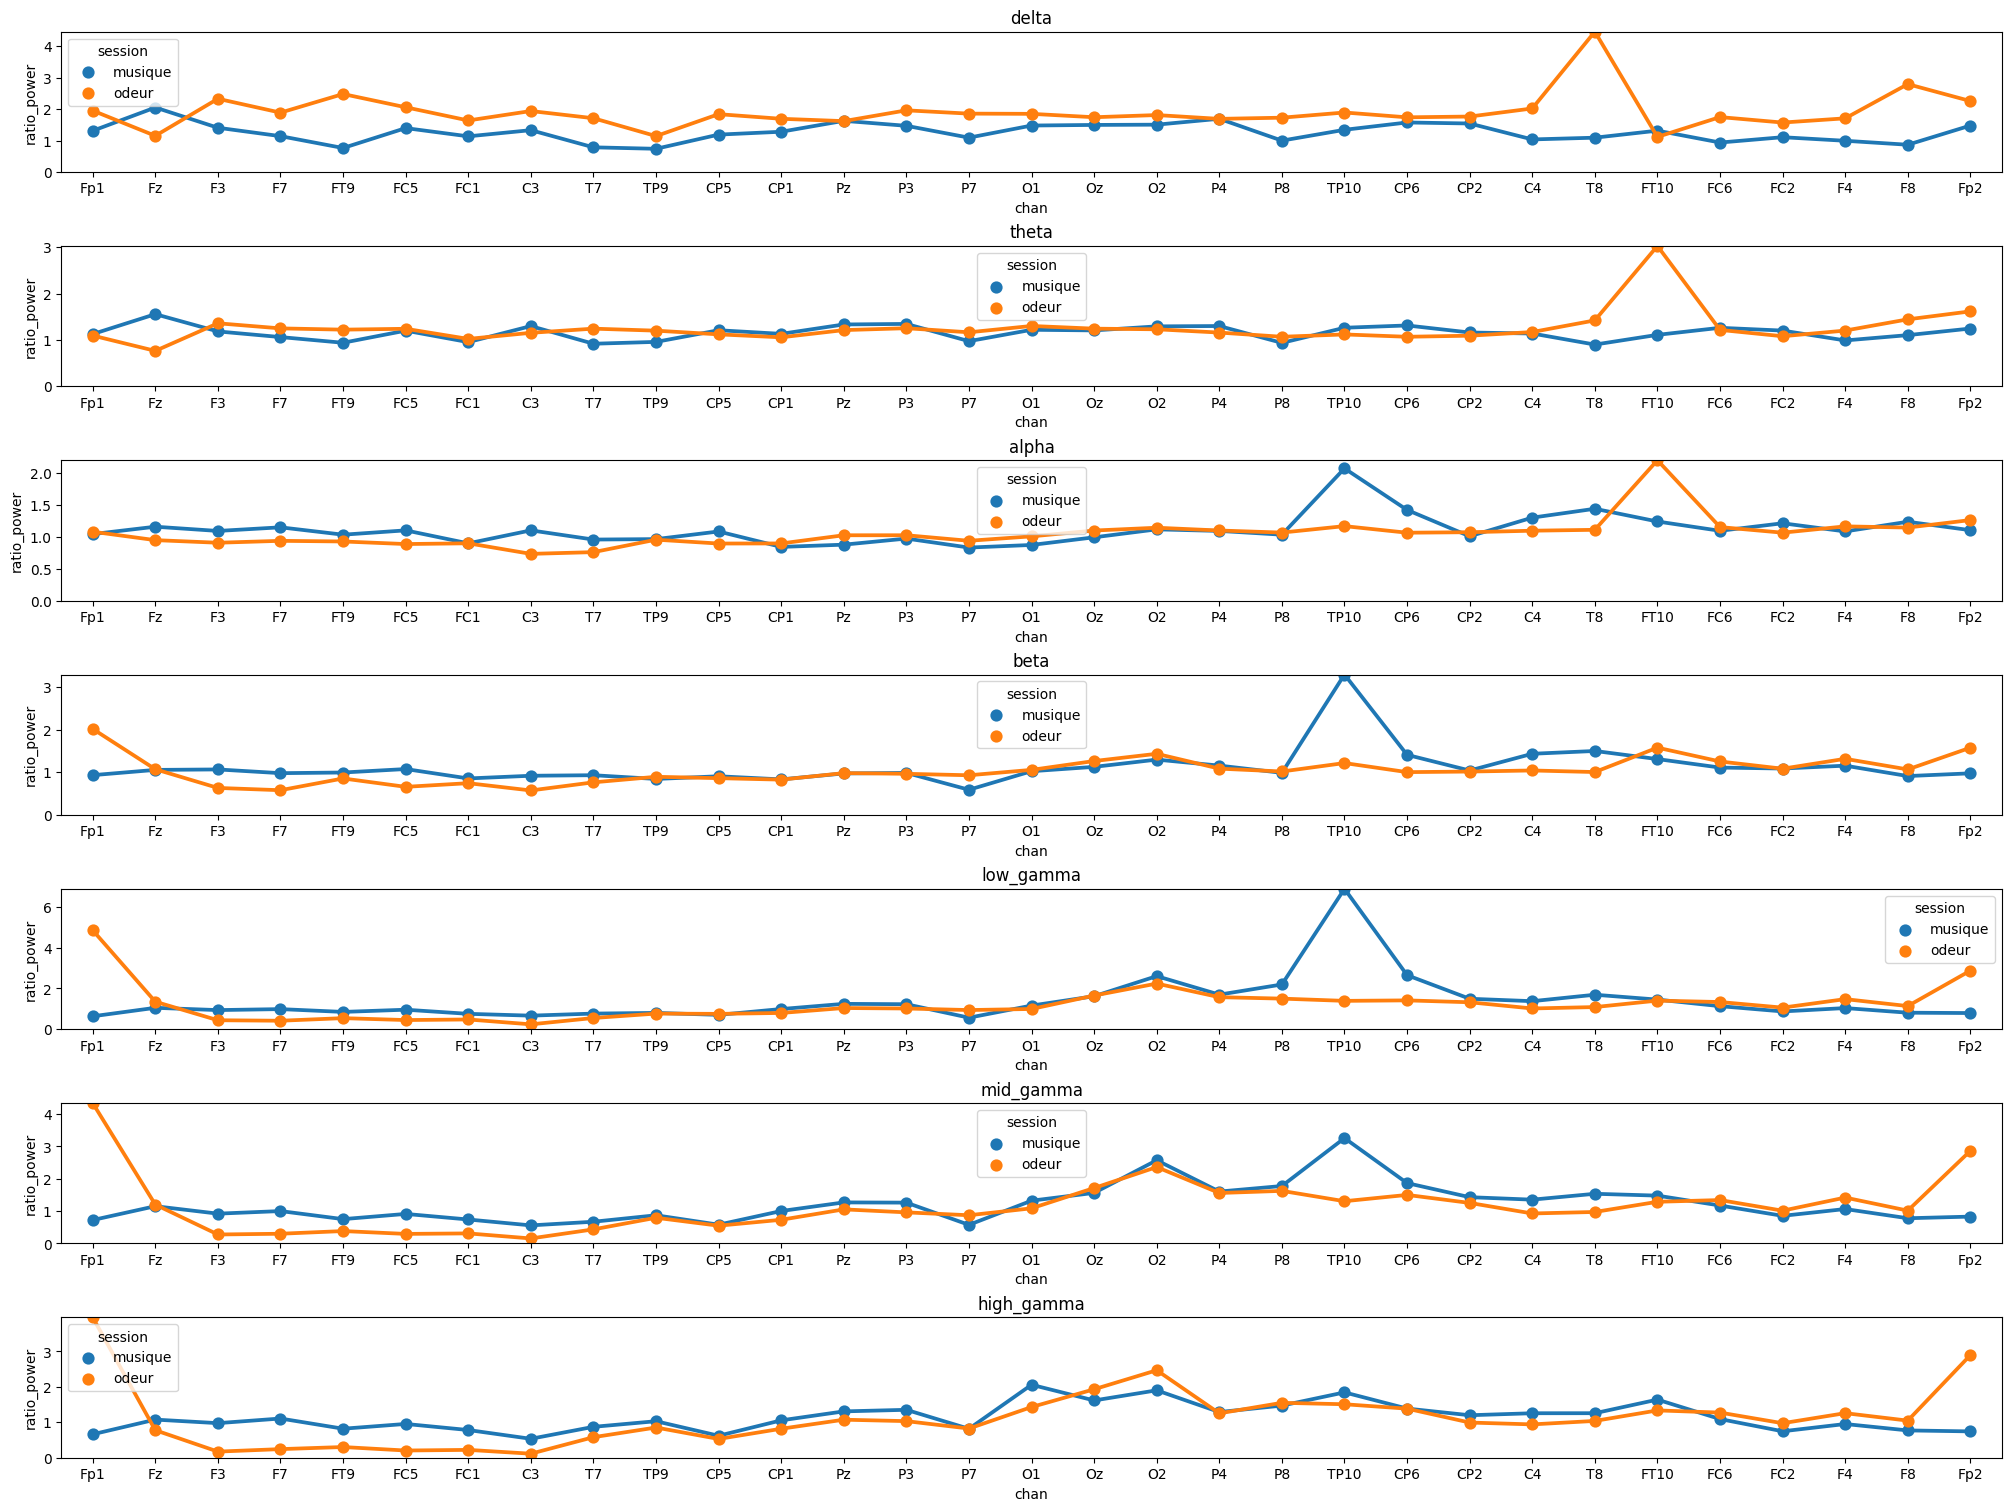

In [96]:
fig, axs = plt.subplots(nrows = len(fbands.keys()), figsize = (20,15), constrained_layout = True)
for r, band in enumerate(fbands.keys()):
    ax = axs[r]
    eeg_power_band = eeg_power_norm[eeg_power_norm['band'] == band]
    sns.pointplot(data = eeg_power_band , x = 'chan', y = 'ratio_power', hue = 'session', ax=ax)
    ax.set_ylim(0, eeg_power_band['ratio_power'].max())
    ax.set_title(band)

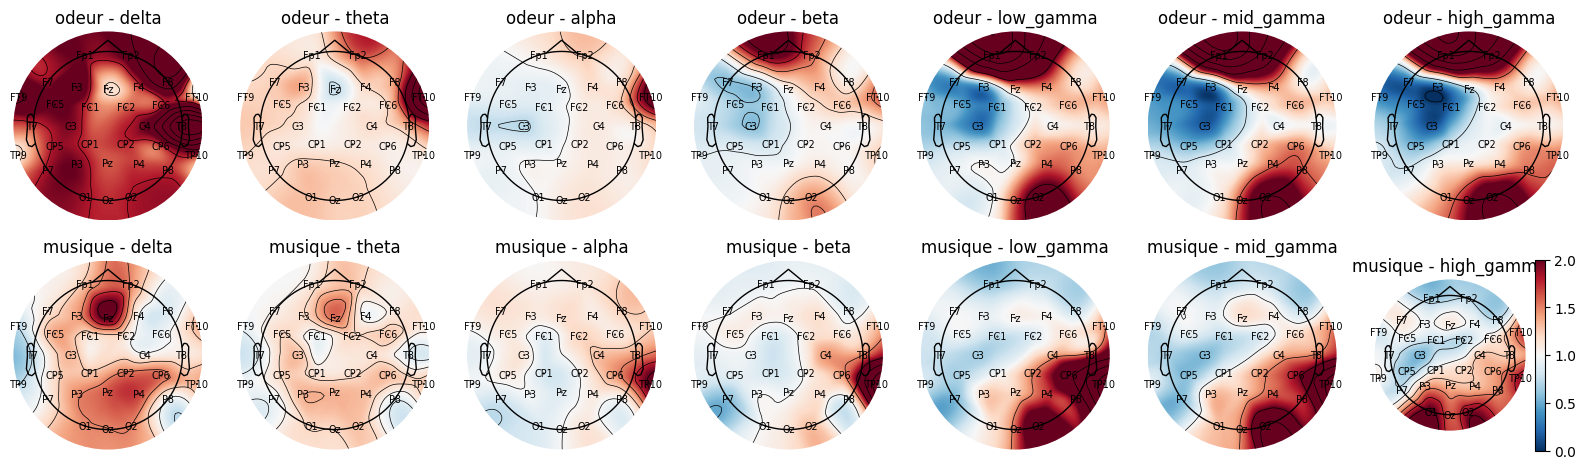

In [118]:
fig, axs = plt.subplots(nrows = 2, ncols = len(fbands.keys()), figsize = (20,5))
vlim = (0, 2)
for r, session in enumerate(['odeur','musique']):
    for c, band in enumerate(fbands.keys()):
        ax = axs[r,c]
        data = eeg_power_norm[(eeg_power_norm['session'] == session) & (eeg_power_norm['band'] == band)]
        im, cn = mne.viz.plot_topomap(data=data['ratio_power'].values, pos = raw.info, names  = eeg_chans, vlim=vlim,  axes=ax, show = False, cmap = 'RdBu_r')
        ax.set_title(f'{session} - {band}')
fig.colorbar(im)